In [112]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [65]:
bank=pd.read_csv("C://Users//kamal//Downloads//bank_data.csv")

In [66]:
bank

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [67]:
bank.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [68]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [69]:
bank.shape

(1882, 6)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'expected_recovery_amount'}>],
       [<AxesSubplot:title={'center':'actual_recovery_amount'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

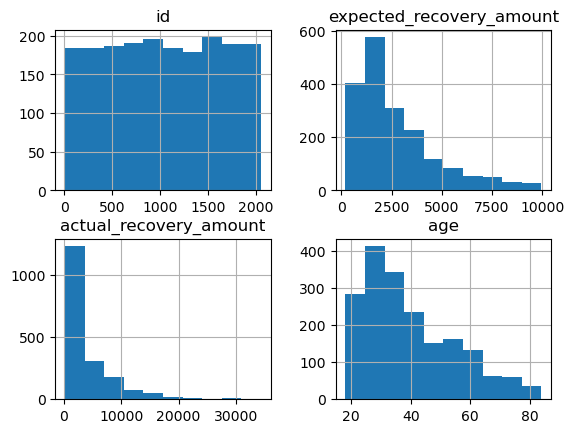

In [70]:
bank.hist()

In [71]:
bank.drop("id",axis=1,inplace=True)

In [72]:
bank

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,194,263.540000,Level 0 Recovery,19,Male
1,486,416.090000,Level 0 Recovery,25,Female
2,527,429.350000,Level 0 Recovery,27,Male
3,536,296.990000,Level 0 Recovery,25,Male
4,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...
1877,9785,15388.195990,Level 4 Recovery,65,Female
1878,9857,9709.909257,Level 4 Recovery,68,Female
1879,9859,30209.181790,Level 4 Recovery,58,Female
1880,9920,20386.232190,Level 4 Recovery,67,Female


In [73]:
bank.describe()

,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000
mean,2759.967588,4000.967837,39.650372
std,2019.826565,4576.506350,15.453072
min,194.000000,200.425000,18.000000
25%,1261.250000,1045.190300,28.000000
50%,2062.000000,2115.446373,35.000000
75%,3569.500000,5417.237207,50.000000
max,9964.000000,34398.479710,84.000000


# Bar plot for Sex

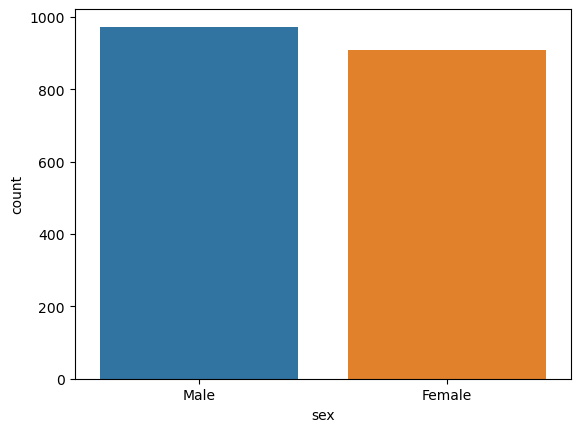

In [76]:
sns.countplot(data=bank,x='sex')
plt.show()

# Count plot for Sex and Expected Recovery Amount

<AxesSubplot:xlabel='sex', ylabel='count'>

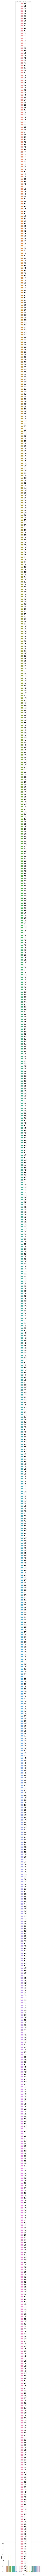

In [93]:
sns.countplot(data=bank,x='sex',hue = 'expected_recovery_amount')

# Box plot for Age and Recovery Amount

<AxesSubplot:xlabel='age', ylabel='actual_recovery_amount'>

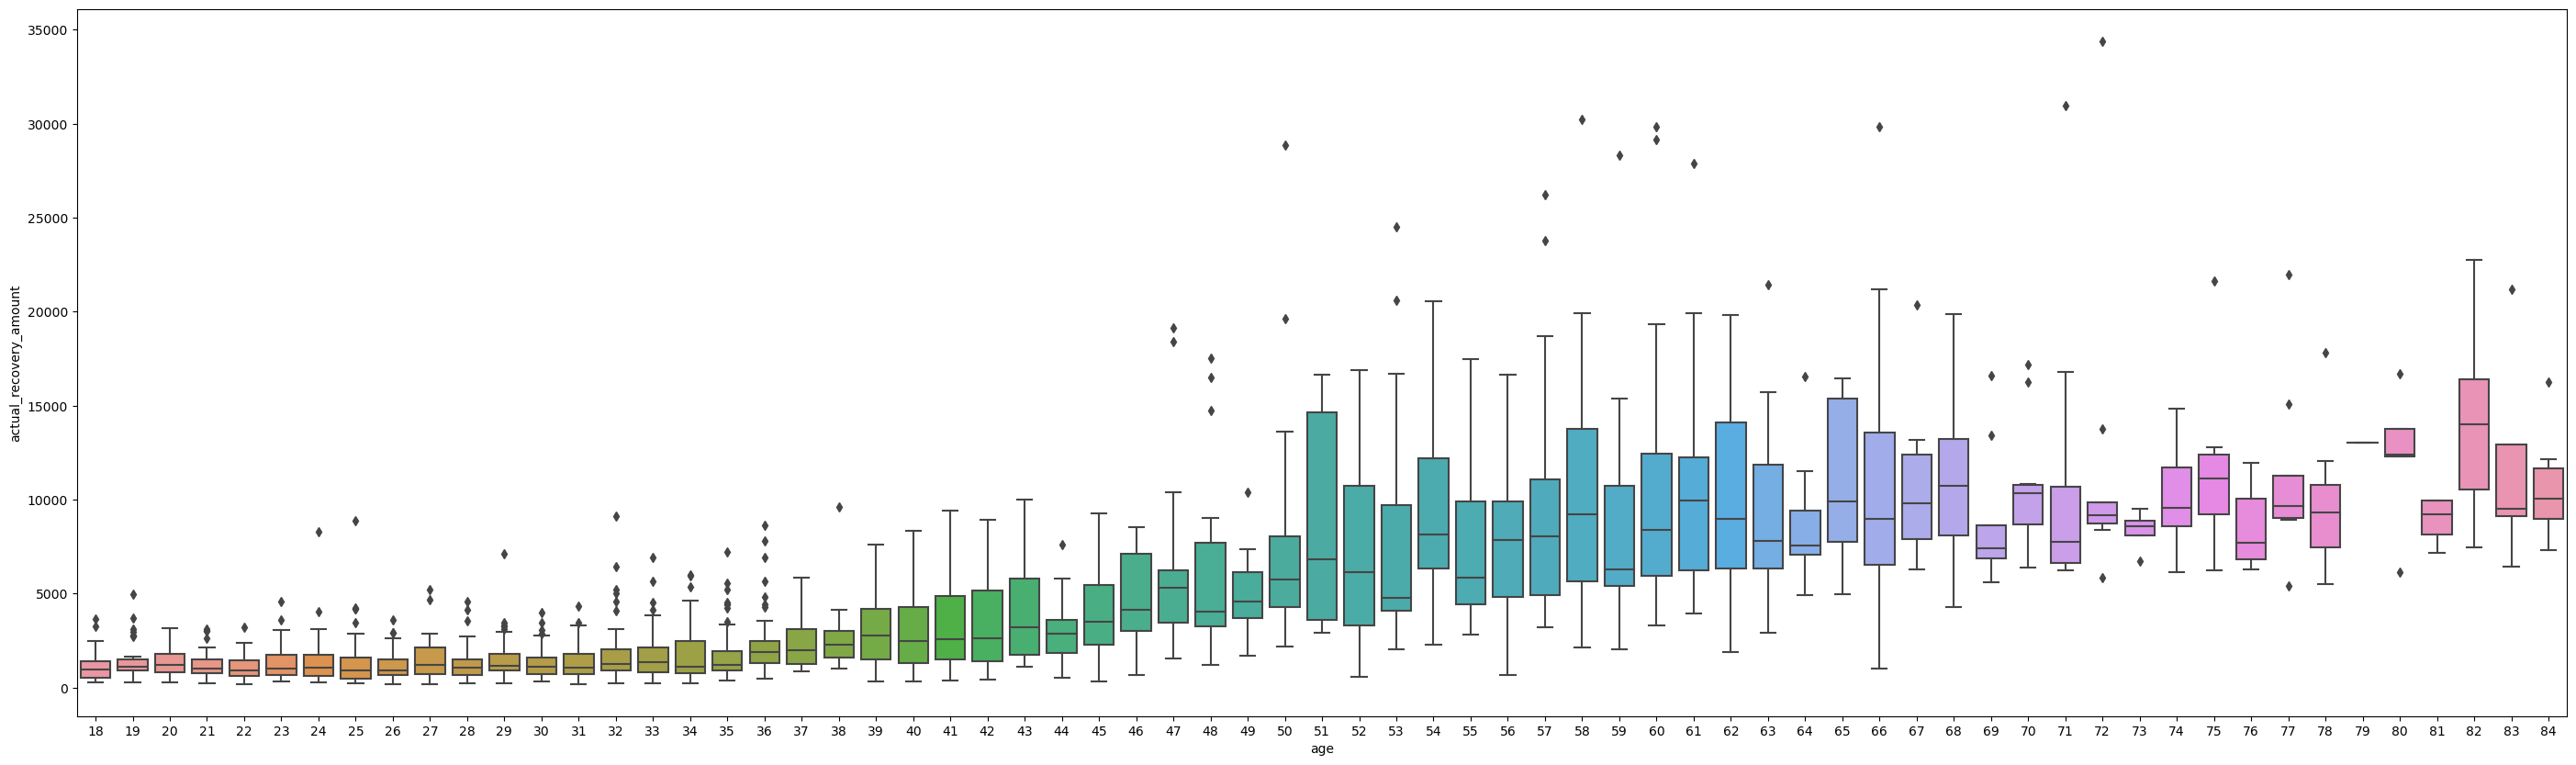

In [86]:
plt.figure(figsize=(35, 10))
sns.boxplot(data=bank,x='age',y='actual_recovery_amount')

# Bar plot for Recovery Strategies


<Figure size 1000x800 with 0 Axes>

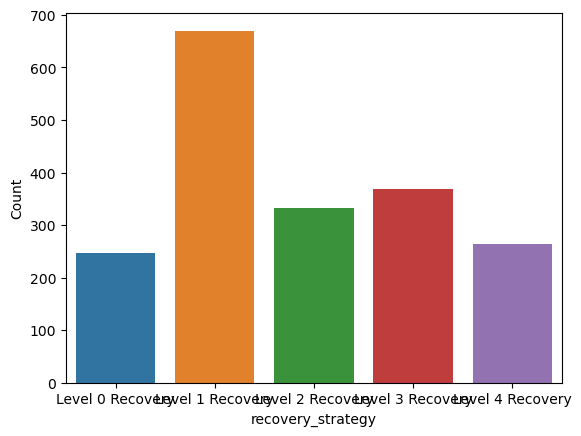

<Figure size 1000x800 with 0 Axes>

In [100]:
sns.countplot(data=bank,x='recovery_strategy')
plt.ylabel('Count')
plt.figure(figsize=(10,8 ))


# Statistical test: age vs expected recovery amount

In [101]:
age = bank['age']
expected_recovery_amount = bank['expected_recovery_amount']

In [105]:
range_mask = (expected_recovery_amount >= 900) & (expected_recovery_amount <= 1100)
age_range = age[range_mask]
     
above_threshold = expected_recovery_amount > 1000
below_threshold = expected_recovery_amount <= 1000

age_above_threshold = age_range[above_threshold[range_mask]]
age_below_threshold = age_range[below_threshold[range_mask]]
     

# Perform the t-test

In [106]:
t_stat, p_value = stats.ttest_ind(age_above_threshold, age_below_threshold, equal_var=False)

# Display the results
print("T-statistic:", t_stat)
print("p-value:", p_value)
     

T-statistic: 1.6090357512691353
p-value: 0.10938147433215123


In [108]:
actual_recovery_amount = bank['actual_recovery_amount']
recovery_strategy = bank['recovery_strategy']

In [109]:
window1_mask = (expected_recovery_amount >= 900) & (expected_recovery_amount <= 1100)

actual_recovery_window1 = actual_recovery_amount[window1_mask]
     
window2_mask = (expected_recovery_amount >= 950) & (expected_recovery_amount <= 1050)

actual_recovery_window2 = actual_recovery_amount[window2_mask]

# Performing the Kruskal-Wallis test

In [110]:
     
kruskal_result1 = stats.kruskal(actual_recovery_window1[expected_recovery_amount[window1_mask] <= 1000],
                                actual_recovery_window1[expected_recovery_amount[window1_mask] > 1000])

kruskal_result2 = stats.kruskal(actual_recovery_window2[expected_recovery_amount[window2_mask] <= 1000],
                                actual_recovery_window2[expected_recovery_amount[window2_mask] > 1000])


In [111]:
print("Kruskal-Wallis Test Result for Window 1:")
print("Statistic:", kruskal_result1.statistic)
print("p-value:", kruskal_result1.pvalue)

print("\nKruskal-Wallis Test Result for Window 2:")
print("Statistic:", kruskal_result2.statistic)
print("p-value:", kruskal_result2.pvalue)
     

Kruskal-Wallis Test Result for Window 1:
Statistic: 64.89840778685254
p-value: 7.886077128395961e-16

Kruskal-Wallis Test Result for Window 2:
Statistic: 30.9924872487249
p-value: 2.5902913533269003e-08


The Kruskal-Wallis test is a non-parametric statistical test used to determine whether there are significant differences between the medians of two or more groups. The test is suitable for comparing groups when the assumptions of normality and equal variances required by parametric tests like the analysis of variance (ANOVA) are not met.



# Regression modeling

In [113]:
X = bank['expected_recovery_amount']
y= bank['actual_recovery_amount']

In [115]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
     

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                            18:46:31   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [121]:
bank['above_threshold'] = (bank['expected_recovery_amount'] > 1000).astype(int)
Xa = bank[['expected_recovery_amount', 'above_threshold']]
ya = bank['actual_recovery_amount']

In [122]:
Xa = sm.add_constant(Xa)
a = sm.OLS(ya, Xa).fit()
print(a.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                            18:51:29   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

The summary of the regression analysis shows that the expected_recovery_amount is a significant predictor of the actual_recovery_amount. The coefficient for the expected_recovery_amount is positive, which means that as the expected_recovery_amount increases, the actual_recovery_amount also increases. The above_threshold variable is also a significant predictor of the actual_recovery_amount. The coefficient for the above_threshold variable is negative, which means that if the expected_recovery_amount is above 1000, the actual_recovery_amount will be lower than if the expected_recovery_amount is below 1000.